In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IP/Project/jsbach_chorals_harmony.data')

In [3]:
data

,Choral ID,Event number,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter,Chord label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,015505b_,105,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4,G_m
5661,015505b_,106,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3,G_m
5662,015505b_,107,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5,C_M
5663,015505b_,108,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3,C_M


In [4]:
data.shape

(5665, 17)

In [5]:
data.head()

,Choral ID,Event number,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter,Chord label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M


In [6]:
data.describe()

,Event number,Meter
count,5665.000000,5665.000000
mean,53.374404,3.134863
std,37.268208,1.109710
min,1.000000,1.000000
25%,24.000000,2.000000
50%,48.000000,3.000000
75%,75.000000,4.000000
max,207.000000,5.000000


In [7]:
data.isnull().any()

Choral ID       False
Event number    False
C               False
C#/Db           False
D               False
D#/Eb           False
E               False
F               False
F#/Gb           False
G               False
G#/Ab           False
A               False
A#/Bb           False
B               False
Bass            False
Meter           False
Chord label     False
dtype: bool

In [8]:
data.isna().any()

Choral ID       False
Event number    False
C               False
C#/Db           False
D               False
D#/Eb           False
E               False
F               False
F#/Gb           False
G               False
G#/Ab           False
A               False
A#/Bb           False
B               False
Bass            False
Meter           False
Chord label     False
dtype: bool

In [9]:
Y = data['Chord label']
X = data.drop(['Chord label','Choral ID', 'Event number'], axis = 1)
feature_names = X.columns

In [10]:
X.replace(('YES', 'NO'), (1, 0), inplace=True)
X

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter
0,1,0,0,0,0,1,0,0,0,1,0,0,F,3
1,1,0,0,0,1,0,0,1,0,0,0,0,E,5
2,1,0,0,0,1,0,0,1,0,0,0,0,E,2
3,1,0,0,0,0,1,0,0,0,1,0,0,F,3
4,1,0,0,0,0,1,0,0,0,1,0,0,F,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,0,0,1,0,0,0,0,1,0,0,1,0,G,4
5661,0,0,1,0,0,0,0,1,0,1,0,0,G,3
5662,1,0,0,0,1,0,0,1,0,0,0,0,C,5
5663,1,0,0,0,1,0,0,1,0,0,1,0,C,3


<ipython-input-11-7d71397c46d1>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X.corr()


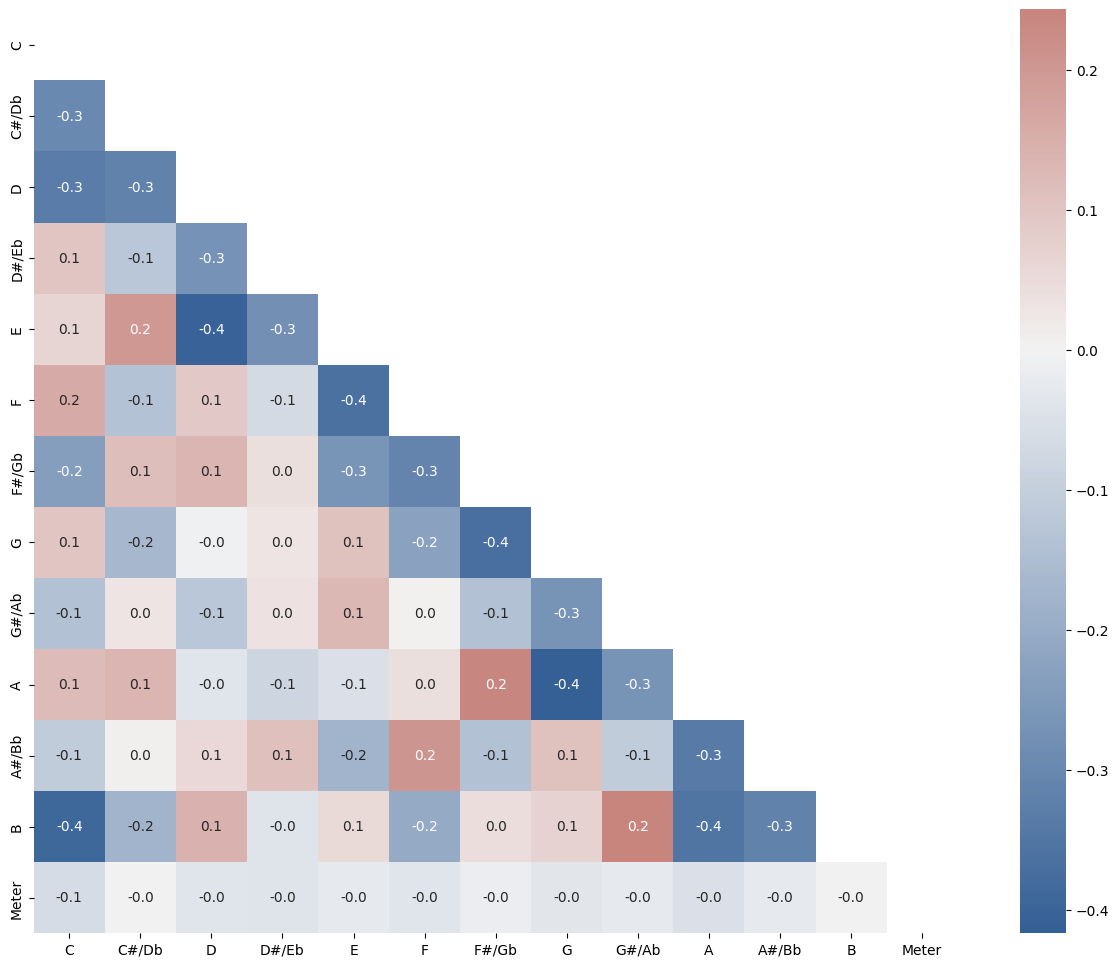

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.1f', square=True, cmap=cmap)

plt.show();

In [12]:
X.corr()

<ipython-input-12-6b9de402e4ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Meter
C,1.000000,-0.295704,-0.332837,0.097506,0.062389,0.157158,-0.234498,0.098802,-0.138829,0.119702,-0.109264,-0.395163,-0.062759
C#/Db,-0.295704,1.000000,-0.317827,-0.121738,0.198896,-0.134333,0.115822,-0.163148,0.030929,0.133876,0.008665,-0.177136,-0.004106
D,-0.332837,-0.317827,1.000000,-0.270434,-0.406000,0.091450,0.133660,-0.004601,-0.121823,-0.039540,0.055649,0.141882,-0.038696
D#/Eb,0.097506,-0.121738,-0.270434,1.000000,-0.278721,-0.068423,0.039811,0.031815,0.034148,-0.082428,0.111332,-0.041477,-0.040682
E,0.062389,0.198896,-0.406000,-0.278721,1.000000,-0.367192,-0.266053,0.107154,0.128277,-0.050901,-0.178316,0.053460,-0.022207
F,0.157158,-0.134333,0.091450,-0.068423,-0.367192,1.000000,-0.309987,-0.225628,0.006095,0.041608,0.205765,-0.204877,-0.038440
F#/Gb,-0.234498,0.115822,0.133660,0.039811,-0.266053,-0.309987,1.000000,-0.371024,-0.139056,0.240683,-0.140650,0.047035,-0.014500
G,0.098802,-0.163148,-0.004601,0.031815,0.107154,-0.225628,-0.371024,1.000000,-0.269287,-0.416834,0.107915,0.070307,-0.035063
G#/Ab,-0.138829,0.030929,-0.121823,0.034148,0.128277,0.006095,-0.139056,-0.269287,1.000000,-0.269217,-0.108532,0.243515,-0.027228
A,0.119702,0.133876,-0.039540,-0.082428,-0.050901,0.041608,0.240683,-0.416834,-0.269217,1.000000,-0.336956,-0.350731,-0.048780
